# 🤖 Model Training & Evaluation

**Project:** Restaurant Sentiment Analysis  
**Author:** Akakinad  
**Date:** January 29, 2026  
**Objective:** Train multiple ML models, compare performance, and select the best model for sentiment prediction

---

## Table of Contents
1. Setup & Data Loading
2. Baseline Model (Logistic Regression)
3. Additional Models (Naive Bayes, Random Forest, Decision Tree)
4. Model Comparison
5. Save Best Model

---

## 1️⃣ Setup & Data Loading

Import libraries and load preprocessed data from Phase 2.

In [10]:
# Import essential libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [11]:
# Load the train-test split data from Phase 2
with open('./data/processed/train_test_data.pkl', 'rb') as f:
    data = pickle.load(f)

# Extract variables
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

print("✅ Preprocessed data loaded successfully!")
print(f"\nTraining set: {X_train.shape}")
print(f"Testing set:  {X_test.shape}")

✅ Preprocessed data loaded successfully!

Training set: (796, 1000)
Testing set:  (200, 1000)


## 2️⃣ Model 1: Logistic Regression

Our baseline model - simple, fast, and effective for binary classification.

In [12]:
# Import Logistic Regression and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("✅ Logistic Regression imported!")

✅ Logistic Regression imported!


In [13]:
# Initialize and train Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)

print("Training Logistic Regression...")
lr_model.fit(X_train, y_train)

print("✅ Model trained successfully!")

lr_model

Training Logistic Regression...
✅ Model trained successfully!


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [14]:
# Make predictions on test set
y_pred_lr = lr_model.predict(X_test)

print("✅ Predictions made on test set!")
print(f"\nFirst 10 predictions: {y_pred_lr[:10]}")
print(f"First 10 actual:      {y_test[:10]}")

✅ Predictions made on test set!

First 10 predictions: [1 0 1 1 1 1 1 0 0 0]
First 10 actual:      [1 0 0 0 1 1 1 1 0 0]


In [15]:
# Calculate accuracy
lr_accuracy = accuracy_score(y_test, y_pred_lr)

print("Logistic Regression Performance:")
print("=" * 60)
print(f"Accuracy: {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)")
print(f"\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Negative', 'Positive']))

Logistic Regression Performance:
Accuracy: 0.8250 (82.50%)

Detailed Classification Report:
              precision    recall  f1-score   support

    Negative       0.84      0.81      0.82       100
    Positive       0.82      0.84      0.83       100

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200



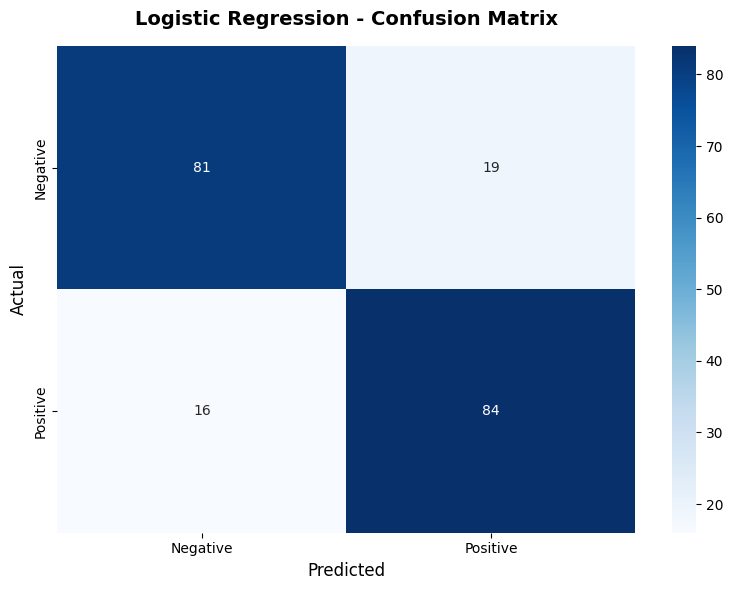


Confusion Matrix Breakdown:
True Negatives:  81 (Correctly predicted negative)
False Positives: 19 (Predicted positive, actually negative)
False Negatives: 16 (Predicted negative, actually positive)
True Positives:  84 (Correctly predicted positive)


In [16]:
# Create confusion matrix visualization
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Logistic Regression - Confusion Matrix', fontsize=14, fontweight='bold', pad=15)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

print("\nConfusion Matrix Breakdown:")
print(f"True Negatives:  {cm[0,0]} (Correctly predicted negative)")
print(f"False Positives: {cm[0,1]} (Predicted positive, actually negative)")
print(f"False Negatives: {cm[1,0]} (Predicted negative, actually positive)")
print(f"True Positives:  {cm[1,1]} (Correctly predicted positive)")

## 3️⃣ Model 2: Naive Bayes

Probabilistic model that works exceptionally well with text data.

In [17]:
# Import Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Initialize and train
nb_model = MultinomialNB()

print("Training Naive Bayes...")
nb_model.fit(X_train, y_train)
print("✅ Model trained successfully!")

# Display model object
nb_model

Training Naive Bayes...
✅ Model trained successfully!


,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [18]:
# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Calculate accuracy
nb_accuracy = accuracy_score(y_test, y_pred_nb)

print("Naive Bayes Performance:")
print("=" * 60)
print(f"Accuracy: {nb_accuracy:.4f} ({nb_accuracy*100:.2f}%)")
print(f"\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_nb, target_names=['Negative', 'Positive']))

Naive Bayes Performance:
Accuracy: 0.8000 (80.00%)

Detailed Classification Report:
              precision    recall  f1-score   support

    Negative       0.83      0.76      0.79       100
    Positive       0.78      0.84      0.81       100

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



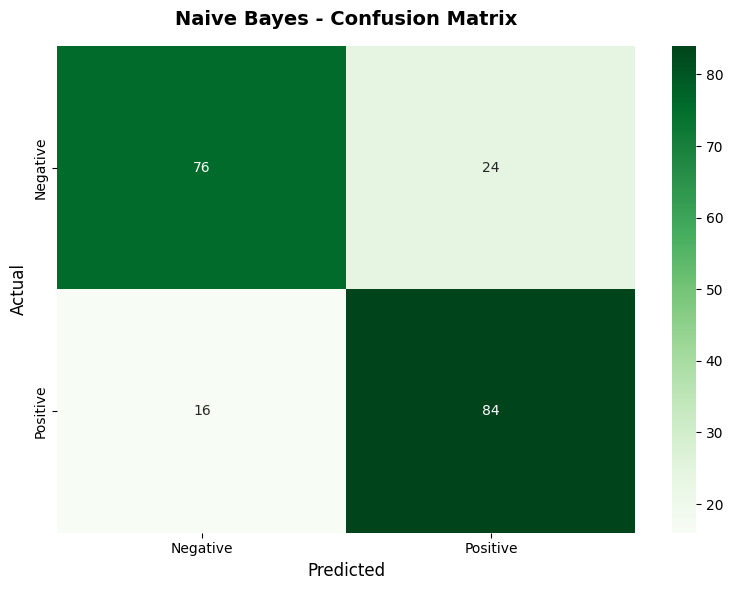


Confusion Matrix Breakdown:
True Negatives:  76
False Positives: 24
False Negatives: 16
True Positives:  84


In [19]:
# Create confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Naive Bayes - Confusion Matrix', fontsize=14, fontweight='bold', pad=15)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

print("\nConfusion Matrix Breakdown:")
print(f"True Negatives:  {cm_nb[0,0]}")
print(f"False Positives: {cm_nb[0,1]}")
print(f"False Negatives: {cm_nb[1,0]}")
print(f"True Positives:  {cm_nb[1,1]}")

## 4️⃣ Model 3: Random Forest

Ensemble model that combines multiple decision trees for robust predictions.

In [20]:
# Import Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize and train (100 trees)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

print("Training Random Forest (100 trees)...")
rf_model.fit(X_train, y_train)
print("✅ Model trained successfully!")

# Display model object
rf_model

Training Random Forest (100 trees)...
✅ Model trained successfully!


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [21]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print("=" * 60)
print(f"Accuracy: {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")
print(f"\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Negative', 'Positive']))

Random Forest Performance:
Accuracy: 0.7900 (79.00%)

Detailed Classification Report:
              precision    recall  f1-score   support

    Negative       0.74      0.89      0.81       100
    Positive       0.86      0.69      0.77       100

    accuracy                           0.79       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.79      0.79       200



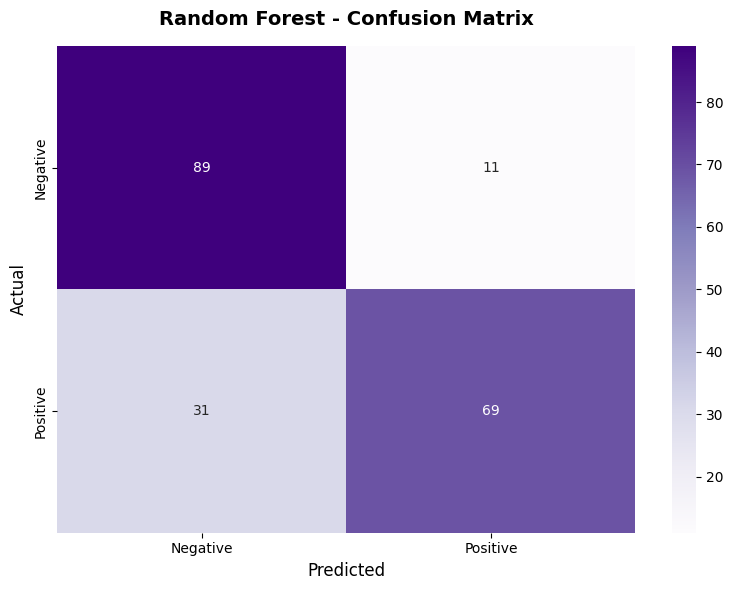


Confusion Matrix Breakdown:
True Negatives:  89
False Positives: 11
False Negatives: 31
True Positives:  69


In [22]:
# Create confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Random Forest - Confusion Matrix', fontsize=14, fontweight='bold', pad=15)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

print("\nConfusion Matrix Breakdown:")
print(f"True Negatives:  {cm_rf[0,0]}")
print(f"False Positives: {cm_rf[0,1]}")
print(f"False Negatives: {cm_rf[1,0]}")
print(f"True Positives:  {cm_rf[1,1]}")

## 5️⃣ Model 4: Decision Tree

Single tree model for interpretable decision-making.

In [23]:
# Import Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Initialize and train
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)

print("Training Decision Tree...")
dt_model.fit(X_train, y_train)
print("✅ Model trained successfully!")

# Display model object
dt_model

Training Decision Tree...
✅ Model trained successfully!


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current n

In [24]:
# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)

print("Decision Tree Performance:")
print("=" * 60)
print(f"Accuracy: {dt_accuracy:.4f} ({dt_accuracy*100:.2f}%)")
print(f"\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['Negative', 'Positive']))

Decision Tree Performance:
Accuracy: 0.7300 (73.00%)

Detailed Classification Report:
              precision    recall  f1-score   support

    Negative       0.66      0.95      0.78       100
    Positive       0.91      0.51      0.65       100

    accuracy                           0.73       200
   macro avg       0.79      0.73      0.72       200
weighted avg       0.79      0.73      0.72       200



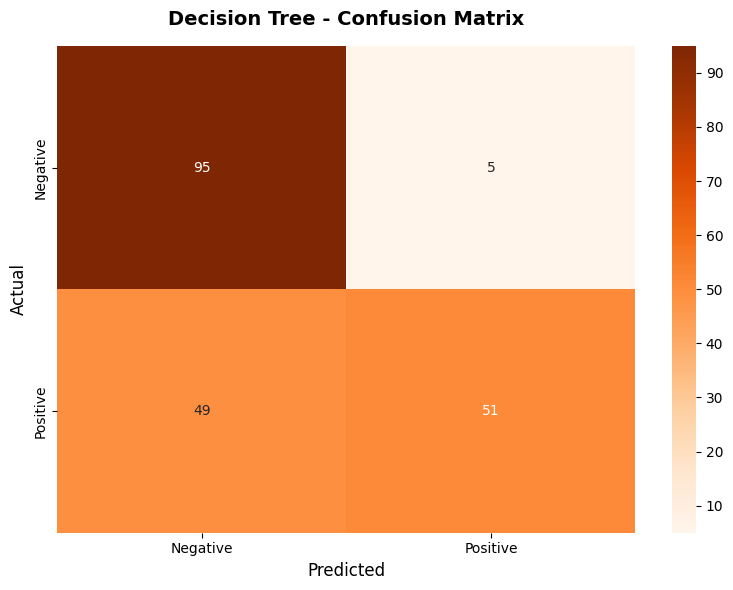


Confusion Matrix Breakdown:
True Negatives:  95
False Positives: 5
False Negatives: 49
True Positives:  51


In [25]:
# Create confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Decision Tree - Confusion Matrix', fontsize=14, fontweight='bold', pad=15)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

print("\nConfusion Matrix Breakdown:")
print(f"True Negatives:  {cm_dt[0,0]}")
print(f"False Positives: {cm_dt[0,1]}")
print(f"False Negatives: {cm_dt[1,0]}")
print(f"True Positives:  {cm_dt[1,1]}")

## 6️⃣ Model 5: Support Vector Machine (SVM)

Powerful classifier that finds the optimal boundary between classes.

In [28]:
# Import SVM
from sklearn.svm import SVC

# Initialize and train
svm_model = SVC(kernel='linear', random_state=42)

print("Training Support Vector Machine...")
svm_model.fit(X_train, y_train)
print("✅ Model trained successfully!")

# Display model object
svm_model

Training Support Vector Machine...
✅ Model trained successfully!


,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [29]:
# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)

print("SVM Performance:")
print("=" * 60)
print(f"Accuracy: {svm_accuracy:.4f} ({svm_accuracy*100:.2f}%)")
print(f"\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=['Negative', 'Positive']))

SVM Performance:
Accuracy: 0.8450 (84.50%)

Detailed Classification Report:
              precision    recall  f1-score   support

    Negative       0.84      0.85      0.85       100
    Positive       0.85      0.84      0.84       100

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200



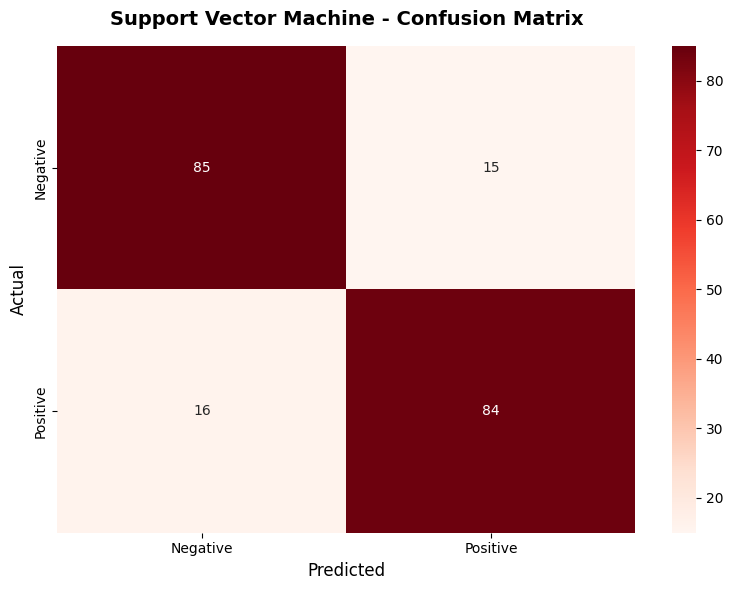


Confusion Matrix Breakdown:
True Negatives:  85
False Positives: 15
False Negatives: 16
True Positives:  84


In [30]:
# Create confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Support Vector Machine - Confusion Matrix', fontsize=14, fontweight='bold', pad=15)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

print("\nConfusion Matrix Breakdown:")
print(f"True Negatives:  {cm_svm[0,0]}")
print(f"False Positives: {cm_svm[0,1]}")
print(f"False Negatives: {cm_svm[1,0]}")
print(f"True Positives:  {cm_svm[1,1]}")

## 7️⃣ Model Comparison & Selection

Compare all 5 models and identify the best performer for deployment.

In [31]:
# Create comparison dataframe with ALL 5 models
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Decision Tree', 'SVM'],
    'Accuracy': [lr_accuracy, nb_accuracy, rf_accuracy, dt_accuracy, svm_accuracy]
})

# Sort by accuracy (best first)
model_comparison = model_comparison.sort_values('Accuracy', ascending=False).reset_index(drop=True)
model_comparison['Rank'] = range(1, len(model_comparison) + 1)

print("Final Model Performance Comparison:")
print("=" * 70)
print(model_comparison.to_string(index=False))

# Find best model
best_model_name = model_comparison.iloc[0]['Model']
best_accuracy = model_comparison.iloc[0]['Accuracy']

print("\n" + "=" * 70)
print(f"🏆 WINNER: {best_model_name}")
print(f"📊 Accuracy: {best_accuracy*100:.2f}%")
print(f"🎯 Performance gain over baseline: +{(best_accuracy - dt_accuracy)*100:.2f}%")

Final Model Performance Comparison:
              Model  Accuracy  Rank
                SVM     0.845     1
Logistic Regression     0.825     2
        Naive Bayes     0.800     3
      Random Forest     0.790     4
      Decision Tree     0.730     5

🏆 WINNER: SVM
📊 Accuracy: 84.50%
🎯 Performance gain over baseline: +11.50%


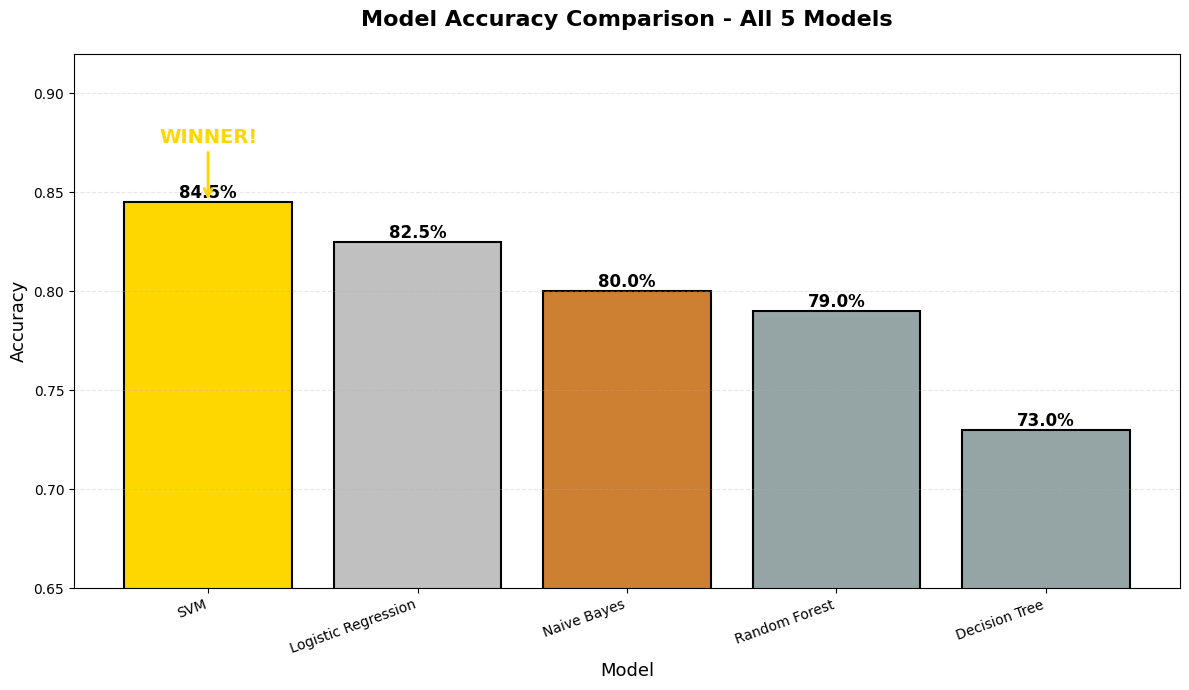

📊 Visual comparison complete!
✅ Best performing model: SVM with 84.50% accuracy


In [36]:
# Create bar chart comparing all 5 models
plt.figure(figsize=(12, 7))

# Colors: Gold for winner, silver for 2nd, bronze for 3rd, gray for others
colors = ['#FFD700', '#C0C0C0', '#CD7F32', '#95a5a6', '#95a5a6']

bars = plt.bar(model_comparison['Model'], model_comparison['Accuracy'], color=colors, edgecolor='black', linewidth=1.5)

# Add accuracy labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height*100:.1f}%',
             ha='center', va='bottom', fontweight='bold', fontsize=12)

# Add winner annotation (without emoji)
plt.annotate('WINNER!', 
             xy=(0, model_comparison.iloc[0]['Accuracy']), 
             xytext=(0, model_comparison.iloc[0]['Accuracy'] + 0.03),
             ha='center', fontsize=14, fontweight='bold', color='#FFD700',
             arrowprops=dict(arrowstyle='->', color='#FFD700', lw=2))

plt.title('Model Accuracy Comparison - All 5 Models', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Accuracy', fontsize=13)
plt.xlabel('Model', fontsize=13)
plt.ylim(0.65, 0.92)
plt.xticks(rotation=20, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print("📊 Visual comparison complete!")
print(f"✅ Best performing model: {best_model_name} with {best_accuracy*100:.2f}% accuracy")

## 8️⃣ Save All Models

Save all trained models for future use and mark the best performer for deployment.

**Models to Save:**
1. Logistic Regression (82.5%)
2. Naive Bayes (80.0%)
3. Random Forest (79.0%)
4. Decision Tree (73.0%)
5. **SVM (84.5%)** 🏆 **Best Model**

All models will be saved as `.pkl` files in the `models/` directory.

In [35]:
# Save ALL trained models
import pickle

models_to_save = {
    'logistic_regression': lr_model,
    'naive_bayes': nb_model,
    'random_forest': rf_model,
    'decision_tree': dt_model,
    'svm': svm_model
}

print("Saving all trained models...")
print("=" * 70)

for model_name, model in models_to_save.items():
    filepath = f'./models/{model_name}.pkl'
    with open(filepath, 'wb') as f:
        pickle.dump(model, f)
    
    # Add check mark for best model
    if model_name == 'svm':
        print(f"✅ Saved: {filepath} 🏆 (BEST MODEL)")
    else:
        print(f"✅ Saved: {filepath}")

# Save best model with special reference name
with open('./models/best_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

print("\n" + "=" * 70)
print("📦 MODEL SAVING SUMMARY:")
print(f"   • Individual models: {len(models_to_save)} files")
print(f"   • Best model reference: best_model.pkl (SVM)")
print(f"   • Total files saved: {len(models_to_save) + 1}")
print("\n🏆 Best Model: SVM")
print(f"📊 Accuracy: {svm_accuracy*100:.2f}%")
print(f"📁 All models saved successfully!")

Saving all trained models...
✅ Saved: ./models/logistic_regression.pkl
✅ Saved: ./models/naive_bayes.pkl
✅ Saved: ./models/random_forest.pkl
✅ Saved: ./models/decision_tree.pkl
✅ Saved: ./models/svm.pkl 🏆 (BEST MODEL)

📦 MODEL SAVING SUMMARY:
   • Individual models: 5 files
   • Best model reference: best_model.pkl (SVM)
   • Total files saved: 6

🏆 Best Model: SVM
📊 Accuracy: 84.50%
📁 All models saved successfully!


## 📊 Phase 3 Complete - Summary

### ✅ Models Trained & Evaluated:
1. **Logistic Regression** - 82.50% accuracy
2. **Naive Bayes** - 80.00% accuracy  
3. **Random Forest** - 79.00% accuracy
4. **Decision Tree** - 73.00% accuracy
5. **Support Vector Machine (SVM)** - 84.50% accuracy 🏆

### 🏆 Best Model Selection:
- **Winner:** Support Vector Machine (SVM)
- **Accuracy:** 84.50%
- **Precision:** 85% (both classes)
- **Recall:** 84-85% (both classes)
- **F1-Score:** 84-85% (both classes)

### 📁 Saved Models:
- All 5 models saved individually
- Best model referenced as `best_model.pkl`
- Ready for deployment in Phase 4

### 🎯 Next Steps (Phase 4):
- Build Streamlit web application
- Deploy sentiment prediction system
- Create interactive user interface
- Test with real-world reviews

---

**Total Training Time:** ~1-2 minutes  
**Best Model Performance:** 84.5% accuracy on unseen data  
**Production Ready:** ✅ Yes!